# A thorough analysis of an Ecommerce dataset 
## By
### Eghosa Emmanuel Ojei




* [Introduction](#introduction) 
* [Data wrangling / Cleaning](#Cleaning)
* [Questions to answer](#questions)
* [Exploratory data analysis and Visualizations / Answers to questions](#Eda)
* [Conclusion](#conclusion)
* [References](#Reference)



<a name = "introduction"> Introduction</a>

## About the dataset
The dataset, Train_primo, is basically the data of an e-commerce business about the responses of customers to a campaign. it has 1568 observations(rows) and 27 columns. the columns are <li> id .................................................this is a unique identifier for each observation </li> <li> Year_of_Birth ...............................This is the year the customer was born</li> <li> Education_Level ......................... The highest level of education attained by the user</li> <li> Marital status ................................indicates the marital status of the customers </li> <li> disposable_Income .......................Yearly users household disposable income</li> <li> No_of_kids_in_home.................. Total count of children in the user's home</li> <li> No_of_Teen_in_home ................The number of teenagers in the user's household</li> <li> Date_Customer  ...........................Date of user's enrollment with the company</li> <li> Recency ...................................... Number of days since User's last purchase</li> <li> Discounted_Purchasees .......... Counts of purchases made by the user using coupons</li> <li> WebPurchases ........................ Counts of purchases made by the user through the company's website</li> <li>CatalogPurchases .....................Counts of purchases made by the user using a catalogue</li> <li> StorePurchases .........................Counts of purchases made by the user directly in stores </li> <li>Amount_on_Wines.....................Total amount user user spent on wine and drinks within the last three years </li> <li>Amount_on_Fruits ......................Total amount user spent on fruity food within the last three years</li> <li>Amount_on_MeatProducts.........Total amount user spent on meat products</li> <li> Amount_on_FishProducts...........Total amount user spent on fish products </li> <li>Amount_on_SweetProducts........Total amount user spent on Sweet products</li> <li>Amount_on_GoldProducts...........Total amount user spent on gold products </li> <li>WebVisitsMonth............................Number of times user visited the company's website in a month</li> <li> Cmp1Accepted................ .............Campaign_1 accepted</li> <li> Cmp2Accepted .............................Campaign_2 accepted</li> <li> Cmp3Accepted .............................Campaign_3 accepted</li> <li> Cmp4Accepted .............................Campaign_4 accepted</li> <li> Cmp5Accepted .............................Campaign_5 accepted</li> <li> Any_Complain................................If the customer have made any complain in the last three years</li> <li> Response ......................................The response to this current campaign</li>

<a name ="Cleaning"></a>
## Data wrangling and cleaning

#### Import libraries and the data_set

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning) # this helps us to suppress this type of warnings

# import the dataset
df = pd.read_csv("Train_primo.csv")
pd.set_option("display.max_columns",None)     # To enable maximum display of columns

In [2]:
# Inspect the data_set

print(df.shape)   # to see how many rows and columns in the dataset

df.info()

(1568, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fru

In [3]:
# check to see how the data is
df.head(4)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,1/8/2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0


From above, it is clear that there are 1568 observations or rows, and 27 columns in the data_set. what each column represent has been explained in the introduction section.

#### missing values

In [4]:
df.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

#### Out of the dataset, only the Disposable column contains missing values, and its 16 in number. This number is not significant enough to affect our analysis, and as such will be dropped 

In [5]:
# dropping rows where there is any missing value

df.dropna(inplace=True)

# Verify that there are no more missing values

df.isnull().any()

ID                         False
Year_of_Birth              False
Education_Level            False
Marital_Status             False
Disposable_Income          False
No_of_Kids_in_home         False
No_of_Teen_in_home         False
Date_Customer              False
Recency                    False
Discounted_Purchases       False
WebPurchases               False
CatalogPurchases           False
StorePurchases             False
Amount_on_Wines            False
Amount_on_Fruits           False
Amount_on_MeatProducts     False
Amount_on_FishProducts     False
Amount_on_SweetProducts    False
Amount_on_GoldProds        False
WebVisitsMonth             False
Cmp3Accepted               False
Cmp4Accepted               False
Cmp5Accepted               False
Cmp1Accepted               False
Cmp2Accepted               False
Any_Complain               False
Response                   False
dtype: bool

In [6]:
# checking for duplicated values
df.duplicated().sum()

0

We dont have any row or observation that is duplicated

#### Tidying the data

In [7]:
# the columns "Cmp1Accepted","Cmp2Accepted","Cmp3Accepted","Cmp4Accepted","Cmp5Accepted", can be
# made to form one observatable column, Campaign_accepted, so that the data will be tidy as well as enable us do group_by

melt_pot = ["Cmp1Accepted","Cmp2Accepted","Cmp3Accepted","Cmp4Accepted","Cmp5Accepted"]
id_vars = []
for i in df.columns:
   if i not in melt_pot:
     id_vars.append(i)
df=pd.melt(df, id_vars=id_vars, value_vars=melt_pot,var_name='Campaign_accepted', value_name='value')
    

In [8]:
df.head(20)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Any_Complain,Response,Campaign_accepted,value
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,Cmp1Accepted,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,1/8/2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,Cmp1Accepted,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,1,Cmp1Accepted,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,Cmp1Accepted,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,Cmp1Accepted,1
5,ID_3S3HRGH6,1960,Master,Married,41090.4,0,1,23-03-2014,32,1,0,0,3,13,5,4,0,0,1,5,0,0,Cmp1Accepted,0
6,ID_KJQ9B2LE,1953,Graduation,Single,86673.6,0,0,27-11-2012,94,1,6,7,8,636,31,491,30,14,56,3,0,0,Cmp1Accepted,0
7,ID_6O0NBZXD,1974,Graduation,Together,88711.2,0,0,2/3/2013,61,1,6,5,12,632,94,597,159,91,15,3,0,0,Cmp1Accepted,0
8,ID_M3QFT8WO,1966,Graduation,Together,35606.4,1,1,12/3/2013,13,1,0,0,3,14,4,3,0,4,8,6,0,0,Cmp1Accepted,0
9,ID_745JV5PY,1975,Graduation,Married,41305.2,1,0,1/7/2013,88,1,1,0,2,8,6,7,6,2,9,7,0,0,Cmp1Accepted,0


#### The above doesnt quite do the job, rather than showing the different instances for each id, only the campaign accepted by each observation is required to be shown

In [9]:
# reimport the data_set
df = pd.read_csv("Train_primo.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [11]:
# drop missing data
df = df.dropna()

In [12]:
# creating a mask dataframe to enable us filter
mask_cols = ["ID","Cmp1Accepted","Cmp2Accepted","Cmp3Accepted","Cmp4Accepted","Cmp5Accepted"]
df_mask = df[mask_cols]

In [13]:
df_mask.head(10)

,ID,Cmp1Accepted,Cmp2Accepted,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted
0,ID_4A9AR6FQ,0,0,0,0,0
1,ID_X28T3VEK,0,0,0,0,0
2,ID_AWXARH57,1,0,0,0,0
3,ID_FQVZHE81,0,0,0,0,0
4,ID_QVLWGPRN,1,0,0,0,0
5,ID_3S3HRGH6,0,0,0,0,0
6,ID_KJQ9B2LE,0,0,0,0,0
7,ID_6O0NBZXD,0,0,0,0,0
8,ID_M3QFT8WO,0,0,0,0,0
9,ID_745JV5PY,0,0,0,0,0


In [14]:

df_mask.replace(0,np.NaN,inplace=True)     # replace 0 with null values to show the campaign was not accepted

In [15]:
df_mask.set_index("ID",inplace=True)

In [16]:
df_mask.apply(lambda row: row.first_valid_index(),1)   # this will take the fisrt non_null value across the column

# if however, all are null, it will come back as null


ID
ID_4A9AR6FQ            None
ID_X28T3VEK            None
ID_AWXARH57    Cmp1Accepted
ID_FQVZHE81            None
ID_QVLWGPRN    Cmp1Accepted
                   ...     
ID_XWINUFGG            None
ID_GLVIHZLR            None
ID_O11VSIJY    Cmp4Accepted
ID_VS37P6MS            None
ID_AKHOY7EI            None
Length: 1552, dtype: object

In [17]:
df_mask = df_mask.assign(Campaign_accepted= df_mask.apply(lambda row: row.first_valid_index(),axis=1))

In [18]:
df_mask.head(10)

,Cmp1Accepted,Cmp2Accepted,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Campaign_accepted
ID,,,,,,
ID_4A9AR6FQ,NaN,NaN,NaN,NaN,NaN,None
ID_X28T3VEK,NaN,NaN,NaN,NaN,NaN,None
ID_AWXARH57,1.0,NaN,NaN,NaN,NaN,Cmp1Accepted
ID_FQVZHE81,NaN,NaN,NaN,NaN,NaN,None
ID_QVLWGPRN,1.0,NaN,NaN,NaN,NaN,Cmp1Accepted
ID_3S3HRGH6,NaN,NaN,NaN,NaN,NaN,None
ID_KJQ9B2LE,NaN,NaN,NaN,NaN,NaN,None
ID_6O0NBZXD,NaN,NaN,NaN,NaN,NaN,None
ID_M3QFT8WO,NaN,NaN,NaN,NaN,NaN,None


In [19]:
# Drop the irrelevant cols
drop_cols =["Cmp1Accepted","Cmp2Accepted","Cmp3Accepted","Cmp4Accepted","Cmp5Accepted"]
df_mask.drop(columns=drop_cols,inplace=True)

In [20]:
# merge df and df_mask
df_mask.reset_index(inplace=True)

In [21]:
df = pd.merge(df,df_mask)  # to comnbine both dataframes

In [22]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Campaign_accepted
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,None
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,1/8/2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,None
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,Cmp1Accepted
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,None
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,Cmp1Accepted


In [23]:
# drop the irrelevant columns
drop_cols =["Cmp1Accepted","Cmp2Accepted","Cmp3Accepted","Cmp4Accepted","Cmp5Accepted"]
df.drop(columns=drop_cols,inplace=True)

In [24]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Any_Complain,Response,Campaign_accepted
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,None
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,1/8/2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,None
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,1,Cmp1Accepted
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,None
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,Cmp1Accepted


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1551
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1552 non-null   object 
 1   Year_of_Birth            1552 non-null   int64  
 2   Education_Level          1552 non-null   object 
 3   Marital_Status           1552 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1552 non-null   int64  
 6   No_of_Teen_in_home       1552 non-null   int64  
 7   Date_Customer            1552 non-null   object 
 8   Recency                  1552 non-null   int64  
 9   Discounted_Purchases     1552 non-null   int64  
 10  WebPurchases             1552 non-null   int64  
 11  CatalogPurchases         1552 non-null   int64  
 12  StorePurchases           1552 non-null   int64  
 13  Amount_on_Wines          1552 non-null   int64  
 14  Amount_on_Fruits        

As shown above, campaign_accepted seems to have numerous missing values, this is not desired. we will convert the Null value representation of None, to the string "None" to show that no campaign was accepted

In [26]:
df.replace(np.NaN,"None",inplace=True)   # replaces the numpy null values to string "None"

In [27]:
df.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Any_Complain,Response,Campaign_accepted
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,None
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,1/8/2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,None
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,1,Cmp1Accepted
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,None
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,Cmp1Accepted


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1551
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1552 non-null   object 
 1   Year_of_Birth            1552 non-null   int64  
 2   Education_Level          1552 non-null   object 
 3   Marital_Status           1552 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1552 non-null   int64  
 6   No_of_Teen_in_home       1552 non-null   int64  
 7   Date_Customer            1552 non-null   object 
 8   Recency                  1552 non-null   int64  
 9   Discounted_Purchases     1552 non-null   int64  
 10  WebPurchases             1552 non-null   int64  
 11  CatalogPurchases         1552 non-null   int64  
 12  StorePurchases           1552 non-null   int64  
 13  Amount_on_Wines          1552 non-null   int64  
 14  Amount_on_Fruits        

The colums "Any_Complain" and "Response" are been seen as being of type int64, however, clearly, this are categorical columns. let us replace "No" for 0, and "yes" for 1

In [29]:
df[["Any_Complain","Response"]]= df[["Any_Complain","Response"]].replace({0:"No",1:"Yes"})

In [30]:
#Change the data type of date_customer
# the format of the Date_Customer is not consistent. lets change "/" to "-"

df["Date_Customer"]=df["Date_Customer"].str.replace("/","-")     # convert to string to enable replacement

df["Date_Customer"]= pd.to_datetime(df.Date_Customer,format="%d-%m-%Y")

In [31]:
df["Date_Customer"].head()

0   2014-06-22
1   2013-08-01
2   2013-11-21
3   2013-09-13
4   2014-01-21
Name: Date_Customer, dtype: datetime64[ns]

In [32]:
df.describe()



,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,1970.057345,62381.186598,0.458763,0.498067,55.306057,2.289304,3.995490,2.668170,5.708763,303.798969,29.041881,167.746134,37.179124,26.636598,43.564433,5.335696
std,11.915020,32089.169563,0.539456,0.543406,28.768217,1.921594,2.716923,3.046397,3.257126,340.762432,39.527531,231.170132,54.064378,40.475232,51.059866,2.462629
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,501.750000,35.000000,232.000000,49.000000,33.000000,56.000000,7.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,262.000000,291.000000,20.000000


##### There seems to be too many outliers. both those that are far above, and those that far below the mass of the data. let us use only those data that are within 5 to 95 percent of the "Disposable_income", since we don't have much data

In [33]:
low,high = df["Disposable_Income"].quantile([0.05,0.95])

In [34]:
low

23074.920000000002

In [35]:
high

100608.18

In [36]:
mask = df["Disposable_Income"].between(low,high) # will return True for only data which falls between low and high


In [37]:
df = df[mask]

In [38]:
df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,1969.595272,61579.699427,0.464900,0.533668,55.154011,2.310172,4.041547,2.546562,5.790115,297.352436,28.308023,152.377507,36.662607,25.220630,43.549427,5.351719
std,11.708476,21416.120868,0.542977,0.543068,28.814894,1.783375,2.630888,2.718841,3.212599,324.956977,38.677599,199.434437,53.881245,38.168951,50.446235,2.199431
min,1900.000000,23194.800000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,43349.400000,0.000000,0.000000,30.000000,1.000000,2.000000,0.000000,3.000000,30.750000,4.000000,16.000000,2.000000,1.000000,8.000000,4.000000
50%,1971.000000,60964.200000,0.000000,1.000000,56.000000,2.000000,3.000000,2.000000,5.000000,170.500000,10.000000,64.000000,12.000000,8.000000,26.000000,6.000000
75%,1978.000000,79555.500000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,489.250000,35.000000,213.250000,46.000000,32.000000,57.000000,7.000000
max,1996.000000,100604.400000,2.000000,2.000000,106.000000,13.000000,11.000000,11.000000,13.000000,1498.000000,202.000000,984.000000,259.000000,195.000000,249.000000,10.000000


#### there appears to be some forms of outliers in some columns, we will be dropping them in univariate analysis as maybe necesary

# Questions to be answered
<a name = "questions"></a>

* [what is the relationship between the different features](#features)
* [what is the demographic distribution of the ecommerce customers](#demography)
* [what is the Educational distribution of the ecommerce customers?](#Education)
* [what is the marital_status distribution of the ecommerce customers](#marital)
* [Why were people complaining](#complain)
* [What month are new customers more likely to come](#month)
* [is the eCommerce making progress in terms of customer base](#year)
* [What is the relationship between year of birth and disposable income](#rel)
* [How does the features affect the response](#response)
* [What can be said about those who have a complant and responding to the campaign](#bca)
* [relationship between No of kids at home and average diposable income](#nave)
* [which campaign gives more response](#campaign)
* [Does higher Disposable income mean higher purchases?](#purchase)
* [Does having a complain affect recency?](#recency)




# Exploratory data analysis / Answers to questions
<a name = "Eda"></a>

## what is the relationship between the features
<a name = "features"></a>

It will be easier if we divide the dataset into two; 
one for numerical columns, and the other for categorical columns

In [39]:
# create a list to hold the names of all columns that contains int64 or float64 datatype. ie numerical columns

numeric = []
for i in df.columns:
  if df[i].dtype=="int64" or df[i].dtype=="float64":
    numeric.append(i)

In [40]:
numeric

['Year_of_Birth',
 'Disposable_Income',
 'No_of_Kids_in_home',
 'No_of_Teen_in_home',
 'Recency',
 'Discounted_Purchases',
 'WebPurchases',
 'CatalogPurchases',
 'StorePurchases',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds',
 'WebVisitsMonth']

In [41]:
df_numeric = df[numeric]
df_numeric.head(1)

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
0,1955,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3


In [42]:
# to create the dataframe for categorical columns, we simply take any column that is not in numeric

categoric = []
for i in df.columns:
  if i not in numeric:
    categoric.append(i)
categoric

['ID',
 'Education_Level',
 'Marital_Status',
 'Date_Customer',
 'Any_Complain',
 'Response',
 'Campaign_accepted']

In [43]:
df_categorical = df[categoric]
df_categorical.head(1)

,ID,Education_Level,Marital_Status,Date_Customer,Any_Complain,Response,Campaign_accepted
0,ID_4A9AR6FQ,Graduation,Divorced,2014-06-22,No,No,None


To get the relationship between the numeric features, we simply run a correlation function to see how they affect each other

In [44]:
df_numeric.corr()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
Year_of_Birth,1.000000,-0.243580,0.255132,-0.351910,-0.002531,-0.087706,-0.170010,-0.164728,-0.160819,-0.192973,-0.028308,-0.055482,-0.035238,-0.050464,-0.062453,0.144269
Disposable_Income,-0.243580,1.000000,-0.568677,0.082767,-0.012928,-0.046238,0.534042,0.730550,0.692495,0.728933,0.526885,0.712581,0.556552,0.549559,0.466407,-0.631816
No_of_Kids_in_home,0.255132,-0.568677,1.000000,-0.073782,0.021719,0.192252,-0.414981,-0.549539,-0.535377,-0.526687,-0.393355,-0.472633,-0.402720,-0.391862,-0.383835,0.465036
No_of_Teen_in_home,-0.351910,0.082767,-0.073782,1.000000,-0.000950,0.410734,0.159574,-0.077771,0.079450,0.015669,-0.168029,-0.256297,-0.197324,-0.122920,-0.022197,0.113410
Recency,-0.002531,-0.012928,0.021719,-0.000950,1.000000,-0.007222,-0.030892,0.028306,-0.014263,0.005110,-0.016552,0.016802,-0.014020,0.051229,-0.000124,-0.015503
Discounted_Purchases,-0.087706,-0.046238,0.192252,0.410734,-0.007222,1.000000,0.332156,-0.030405,0.137492,0.071892,-0.105530,-0.142878,-0.123681,-0.059843,0.113960,0.329639
WebPurchases,-0.170010,0.534042,-0.414981,0.159574,-0.030892,0.332156,1.000000,0.452207,0.563264,0.582958,0.330793,0.360919,0.342766,0.359616,0.399262,-0.000545
CatalogPurchases,-0.164728,0.730550,-0.549539,-0.077771,0.028306,-0.030405,0.452207,1.000000,0.573272,0.699522,0.517138,0.703347,0.568357,0.535031,0.511169,-0.532772
StorePurchases,-0.160819,0.692495,-0.535377,0.079450,-0.014263,0.137492,0.563264,0.573272,1.000000,0.648423,0.450149,0.533892,0.454884,0.449205,0.422300,-0.416352
Amount_on_Wines,-0.192973,0.728933,-0.526687,0.015669,0.005110,0.071892,0.582958,0.699522,0.648423,1.000000,0.359140,0.596251,0.390055,0.368594,0.430572,-0.298560


The year column doesnt quite give us a correct meaning. for example, someone born in 1957 is older than someone born in 2012, but this is not what the above is telling us, it becomes necessary to convert the year the customer was born to their true age.

In [45]:
# create a numpy array that contains this current year

present =np.empty(len(df_numeric)) # creates an array of length = len of df_numeric

list = []                  # instantiates an empty list
present.fill(2023)   # populates it with a unique value, 2023

for (i,j) in zip(present,df["Year_of_Birth"]):    # this enable pairing of values in correct order
  list.append(int(i) - j)

df_numeric["Age"] = list    
df_numeric.drop(columns= "Year_of_Birth",inplace=True)

In [46]:
df_numeric.head(1)

,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Age
0,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,68


In [47]:
df_numeric.corr()

,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Age
Disposable_Income,1.000000,-0.568677,0.082767,-0.012928,-0.046238,0.534042,0.730550,0.692495,0.728933,0.526885,0.712581,0.556552,0.549559,0.466407,-0.631816,0.243580
No_of_Kids_in_home,-0.568677,1.000000,-0.073782,0.021719,0.192252,-0.414981,-0.549539,-0.535377,-0.526687,-0.393355,-0.472633,-0.402720,-0.391862,-0.383835,0.465036,-0.255132
No_of_Teen_in_home,0.082767,-0.073782,1.000000,-0.000950,0.410734,0.159574,-0.077771,0.079450,0.015669,-0.168029,-0.256297,-0.197324,-0.122920,-0.022197,0.113410,0.351910
Recency,-0.012928,0.021719,-0.000950,1.000000,-0.007222,-0.030892,0.028306,-0.014263,0.005110,-0.016552,0.016802,-0.014020,0.051229,-0.000124,-0.015503,0.002531
Discounted_Purchases,-0.046238,0.192252,0.410734,-0.007222,1.000000,0.332156,-0.030405,0.137492,0.071892,-0.105530,-0.142878,-0.123681,-0.059843,0.113960,0.329639,0.087706
WebPurchases,0.534042,-0.414981,0.159574,-0.030892,0.332156,1.000000,0.452207,0.563264,0.582958,0.330793,0.360919,0.342766,0.359616,0.399262,-0.000545,0.170010
CatalogPurchases,0.730550,-0.549539,-0.077771,0.028306,-0.030405,0.452207,1.000000,0.573272,0.699522,0.517138,0.703347,0.568357,0.535031,0.511169,-0.532772,0.164728
StorePurchases,0.692495,-0.535377,0.079450,-0.014263,0.137492,0.563264,0.573272,1.000000,0.648423,0.450149,0.533892,0.454884,0.449205,0.422300,-0.416352,0.160819
Amount_on_Wines,0.728933,-0.526687,0.015669,0.005110,0.071892,0.582958,0.699522,0.648423,1.000000,0.359140,0.596251,0.390055,0.368594,0.430572,-0.298560,0.192973
Amount_on_Fruits,0.526885,-0.393355,-0.168029,-0.016552,-0.105530,0.330793,0.517138,0.450149,0.359140,1.000000,0.589566,0.593512,0.578541,0.428522,-0.410895,0.028308


1.  From above, there seems to be quite some interesting findings. for example, it is clear that the more Disposable_Income, the lesser the visits to the ecommerce website, ironically, the higher the disposable income, the higher the purchase from website. what this clearly shows is that the rich customers tend to buy goods on first or second visit to the website, unlike the less rich customers who will visit the website multiple time before deciding to buy 

2.  Again from above, there seems to be the tendency, that people with more kids are less likely to buy gold products, this buttress the point that customers with kids tend to have less disposable income, and as such will want to cut down unnecessary expenses

3.   The column, no_of_Kids_in_home is very interesting. there seem to be almost a negative trends for the number of kid. and the feature for which it has a positive relationship with is webvisitmonth, this means that they really love to buy products, but either they dont have enough disposable income, or the ecommerce store does not sell products made for kids. hence, people with kids may not be an ideal target audience for this business


4.   The more the purchase from one purchasing channel, the less the purchase in alternate channels. This makes practical sense.

# Relationship between categorical features

In [48]:
df_categorical.head()

,ID,Education_Level,Marital_Status,Date_Customer,Any_Complain,Response,Campaign_accepted
0,ID_4A9AR6FQ,Graduation,Divorced,2014-06-22,No,No,None
1,ID_X28T3VEK,Graduation,Together,2013-08-01,No,No,None
3,ID_FQVZHE81,2n Cycle,Single,2013-09-13,No,No,None
4,ID_QVLWGPRN,Graduation,Married,2014-01-21,No,No,Cmp1Accepted
5,ID_3S3HRGH6,Master,Married,2014-03-23,No,No,None


In [49]:
df_categorical.describe(include="object")

,ID,Education_Level,Marital_Status,Any_Complain,Response,Campaign_accepted
count,1396,1396,1396,1396,1396,1396
unique,1396,5,8,2,2,6
top,ID_4A9AR6FQ,Graduation,Married,No,No,None
freq,1,715,546,1385,1202,1133


From above, we can clearly see the distribution of each categorical column. 
much of the work to get the relationship between these features will be done under the bivariate analysis category

# univariate analysis

### Customers demography
<a name = "demography"></a>

In [50]:
df["Year_of_Birth"].nunique()

54

from the above, the number of distinct years are much, and cant allow us to draw a nice looking chart.
we will group them into categories

In [51]:
bins = [1890,1910,1930,1950,1970,1990,2010]   #  partition for grouping the years
labels = ["group_A","group_B","group_C","group_D","group_E","group_F"]   # the name for each grouo
df["Age_class"] = pd.cut(x=df["Year_of_Birth"],bins=bins,labels=labels,right=False)

In [52]:
df.head(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Any_Complain,Response,Campaign_accepted,Age_class
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,No,No,None,group_D
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-08-01,17,6,5,1,8,205,22,111,50,15,19,6,No,No,None,group_D
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,No,No,None,group_E
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,No,No,Cmp1Accepted,group_D
5,ID_3S3HRGH6,1960,Master,Married,41090.4,0,1,2014-03-23,32,1,0,0,3,13,5,4,0,0,1,5,No,No,None,group_D
6,ID_KJQ9B2LE,1953,Graduation,Single,86673.6,0,0,2012-11-27,94,1,6,7,8,636,31,491,30,14,56,3,No,No,None,group_D
7,ID_6O0NBZXD,1974,Graduation,Together,88711.2,0,0,2013-03-02,61,1,6,5,12,632,94,597,159,91,15,3,No,No,None,group_E
8,ID_M3QFT8WO,1966,Graduation,Together,35606.4,1,1,2013-03-12,13,1,0,0,3,14,4,3,0,4,8,6,No,No,None,group_D
9,ID_745JV5PY,1975,Graduation,Married,41305.2,1,0,2013-07-01,88,1,1,0,2,8,6,7,6,2,9,7,No,No,None,group_E
10,ID_PTC313AB,1974,Graduation,Married,31473.6,1,0,2013-09-22,57,1,1,0,2,7,9,4,3,1,9,8,No,No,None,group_E


In [53]:
df["Age_class"].value_counts()

group_E    717
group_D    578
group_C     52
group_F     48
group_A      1
group_B      0
Name: Age_class, dtype: int64

There is no need including those in group_A and group_B in our analysis, they are basically outliers at best

In [54]:
df_without_A= df[df["Age_class"]!= "group_A"] 

In [55]:
age_series = df_without_A["Age_class"].value_counts().sort_values()[2:]
age_series

group_F     48
group_C     52
group_D    578
group_E    717
Name: Age_class, dtype: int64

In [56]:
# creating a plotting function

def univariate_plotter(series,kind,x_label,y_label,title):
  
  
  if kind == "pie":
    autopct="%.1f%%"
    graph= series.plot(kind=kind,autopct=autopct)
    y_label =""
    plt.ylabel(y_label)
  else:
    graph= series.plot(kind=kind)
    y_label=y_label
    plt.ylabel(y_label)
    plt.xlabel(x_label)
  plt.title(title)
  return graph

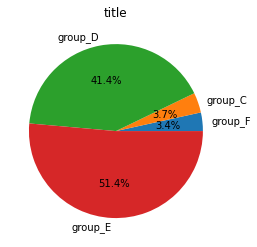

In [57]:
age_graph = univariate_plotter(age_series,"pie","x_label","y_label","title")

from above, those customers that are in group_E representing those given birth from 1971 to 1990 and those in group_D representing those that were given birth from 1951 to 1970 constitute more than 90 percent of the customer base.

### Education level
<a name = "Education"></a>

In [58]:
df["Education_Level"].unique()

array(['Graduation', '2n Cycle', 'Master', 'PhD', 'Basic'], dtype=object)

#### from above, we can see that the customers education level is divided into 5 categories. but, how many customers falls in each group

In [59]:
# create a function to generate series

def series_gen(col_name):
  series = df[col_name].value_counts().sort_values()
  return series

age_series=series_gen("Age_class")

In [60]:
education_series= series_gen("Education_Level")

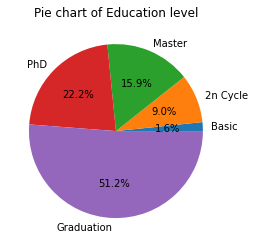

In [61]:
education_plot =univariate_plotter(education_series,"pie","Education","y_label","Pie chart of Education level")

### Marital status
<a name = "marital"></a>

In [62]:
# take a look the marital status column
df["Marital_Status"].head(2)

0    Divorced
1    Together
Name: Marital_Status, dtype: object

In [63]:
# check to see the distinct values in the column
df["Marital_Status"].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [64]:
#get the number of values in each distinct values
marital_series = series_gen("Marital_Status")
marital_series

Absurd        1
YOLO          2
Alone         3
Widow        47
Divorced    145
Single      282
Together    370
Married     546
Name: Marital_Status, dtype: int64

the value, Alone seems ambiguous, since they are not classified as being single, they could be a special set of people. also, YOLO and Absurd do not convey much meaning.
it is necessary to group, Alone, YOLO and absurd into one. we will call it Other

In [65]:
map = {"Alone":"New","YOLO":"New","Absurd":"New"}
df["Marital_Status"]=df["Marital_Status"].replace(map)

In [66]:
marital_series = series_gen("Marital_Status")
marital_series

New           6
Widow        47
Divorced    145
Single      282
Together    370
Married     546
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


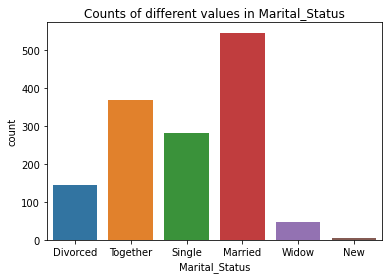

In [67]:
sns.countplot(df["Marital_Status"]).set(title = "Counts of different values in Marital_Status")
plt.show()

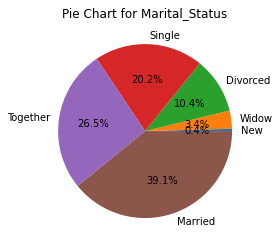

In [68]:
# plot pie chart 
marital_plot = univariate_plotter(marital_series,"pie","Marital_status","ylabe","Pie Chart for Marital_Status")

The charts above shows clearly that customers who are either married, or has a partner constitute the highest chunk of their customer base

### Disposable_income
this is not a categorical column, hence a different type of plot will be used

In [69]:
# take a look at the data
df["Disposable_Income"].head(2)

0    77504.4
1    56784.0
Name: Disposable_Income, dtype: float64

In [70]:
df["Disposable_Income"].describe()

count      1396.000000
mean      61579.699427
std       21416.120868
min       23194.800000
25%       43349.400000
50%       60964.200000
75%       79555.500000
max      100604.400000
Name: Disposable_Income, dtype: float64

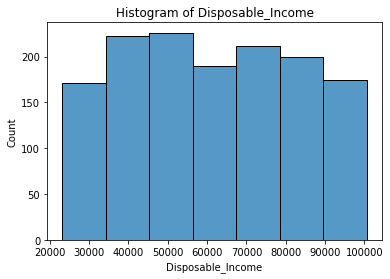

In [71]:
sns.histplot(df["Disposable_Income"],bins=7).set(title="Histogram of Disposable_Income")
plt.show()      # to suppress the outputing of the plot location


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


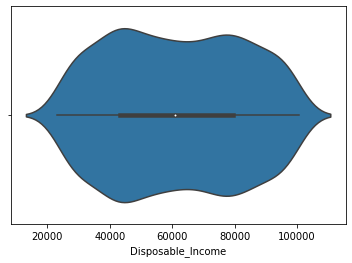

In [72]:
sns.violinplot(df["Disposable_Income"])
plt.show()

above shows that most of the values are concentrated in 25th to 75th percentile

### What month are new customers more likely to come
<a name = "month"></a>

In [73]:
df["Date_Customer"].head()

0   2014-06-22
1   2013-08-01
3   2013-09-13
4   2014-01-21
5   2014-03-23
Name: Date_Customer, dtype: datetime64[ns]

In [74]:
# create a new month column
df["Month"] = df["Date_Customer"].dt.month_name()

In [75]:
month_series = df["Month"].value_counts().sort_values()

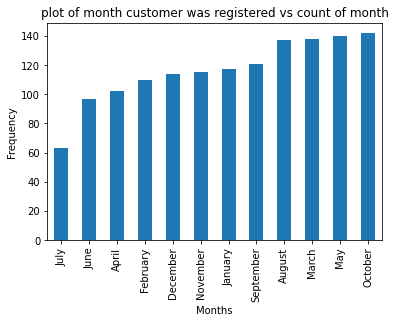

In [76]:
month_plot = univariate_plotter(month_series,"bar","Months","Frequency","plot of month customer was registered vs count of month")

above doesnt quite give us what we want, rather than grouping by month, lets group by quarter

In [77]:
df["Quarter"] = df["Date_Customer"].dt.quarter.astype(str)   # convert to string
df["Quarter"].head()

0    2
1    3
3    3
4    1
5    1
Name: Quarter, dtype: object

In [78]:
quarter_series = series_gen("Quarter")
quarter_series

3    321
2    339
1    365
4    371
Name: Quarter, dtype: int64

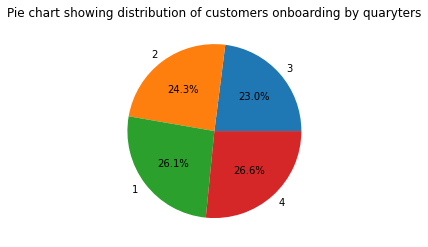

In [79]:
quarter_plot = univariate_plotter(quarter_series,"pie","","","Pie chart showing distribution of customers onboarding by quaryters")

from above, though customers are more likely to visit the ecommerce store during the fourth quarter, there is really no much difference. maybe the ecommerce is not selling products that are seasonal

### What is the growth in customer base over the years
<a name ="year"></a>

In [80]:
# create a new column for year the customer was onboarded

df["year_onboard"] = df['Date_Customer'].dt.year.astype(str)

year_series = df["year_onboard"].value_counts(sort=False)

year_series

2014    344
2013    739
2012    313
Name: year_onboard, dtype: int64

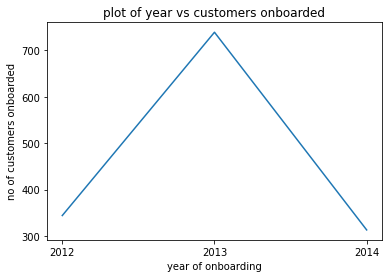

In [81]:
year_plot = plt.plot(year_series.index.sort_values(),year_series.values)
plt.xlabel("year of onboarding")
plt.ylabel("no of customers onboarded")
plt.title("plot of year vs customers onboarded")
plt.show()

looking at the above chart it is easy to say that the ecommerce is not making progress in terms of getting new customers. Despite having a good start from 2012 to 2013, they failed to maintain such pace. perhaps, they stopped advertising

In [82]:
# When in 2014 was the last observation made

df["Date_Customer"].max()

Timestamp('2014-06-29 00:00:00')

Above shows that the last value in 2014 was in June. perhaps more customers will come from July. But from the analysis we made about Quarters, it is obvious that not much customers will come from july to december

# Bi variate analysis

In [83]:
df.corr().head()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
Year_of_Birth,1.000000,-0.243580,0.255132,-0.351910,-0.002531,-0.087706,-0.170010,-0.164728,-0.160819,-0.192973,-0.028308,-0.055482,-0.035238,-0.050464,-0.062453,0.144269
Disposable_Income,-0.243580,1.000000,-0.568677,0.082767,-0.012928,-0.046238,0.534042,0.730550,0.692495,0.728933,0.526885,0.712581,0.556552,0.549559,0.466407,-0.631816
No_of_Kids_in_home,0.255132,-0.568677,1.000000,-0.073782,0.021719,0.192252,-0.414981,-0.549539,-0.535377,-0.526687,-0.393355,-0.472633,-0.402720,-0.391862,-0.383835,0.465036
No_of_Teen_in_home,-0.351910,0.082767,-0.073782,1.000000,-0.000950,0.410734,0.159574,-0.077771,0.079450,0.015669,-0.168029,-0.256297,-0.197324,-0.122920,-0.022197,0.113410
Recency,-0.002531,-0.012928,0.021719,-0.000950,1.000000,-0.007222,-0.030892,0.028306,-0.014263,0.005110,-0.016552,0.016802,-0.014020,0.051229,-0.000124,-0.015503


## Why were people complaining
<a name = "complain"></a>

In [84]:
df["Any_Complain"].value_counts()

No     1385
Yes      11
Name: Any_Complain, dtype: int64

It is strange that out of the total number, only just 11 persons had a complain. but what does these persons that had a complaint share in common

In [85]:
df_complain = df[df["Any_Complain"]=="Yes"]

In [86]:
df_complain.head(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Any_Complain,Response,Campaign_accepted,Age_class,Month,Quarter,year_onboard
60,ID_3LG2NQRX,1984,Master,Single,38145.6,1,0,2014-03-20,22,3,3,0,4,21,10,23,0,8,6,5,Yes,No,None,group_E,March,1,2014
272,ID_8X6UOTWK,1944,Master,Married,78087.6,0,0,2013-08-20,72,1,5,3,5,634,20,177,69,0,8,2,Yes,No,None,group_C,August,3,2013
390,ID_UJA3TUH3,1982,Graduation,Together,46256.4,1,0,2013-08-28,56,1,1,0,2,11,4,10,0,1,4,8,Yes,No,None,group_E,August,3,2013
439,ID_AV27OOZ9,1979,Graduation,Single,46371.6,1,1,2013-11-29,52,2,2,0,3,27,5,14,0,1,10,7,Yes,No,None,group_E,November,4,2013
668,ID_G4EBAAHL,1996,2n Cycle,Single,99908.4,0,0,2012-09-18,63,1,5,10,12,541,30,590,38,107,67,6,Yes,Yes,Cmp3Accepted,group_F,September,3,2012
819,ID_CNNX4EAQ,1960,Graduation,Married,69735.6,0,1,2013-01-25,73,3,9,2,8,226,107,169,102,78,84,7,Yes,No,None,group_D,January,1,2013
991,ID_TGO5UDGC,1955,Graduation,Married,46797.6,1,1,2012-11-03,99,3,2,0,3,39,4,14,0,0,5,8,Yes,No,None,group_D,November,4,2012
1003,ID_0N9UN2J6,1952,Graduation,Divorced,26715.6,1,1,2014-03-30,38,2,1,0,3,22,3,2,0,0,2,6,Yes,No,None,group_D,March,1,2014
1071,ID_PLKN65ZW,1965,Graduation,Married,48960.0,1,2,2013-01-01,84,2,3,0,3,29,3,27,8,30,10,7,Yes,No,None,group_D,January,1,2013
1254,ID_YLDV0MVB,1979,Graduation,Married,80427.6,0,0,2014-03-04,100,1,3,7,13,449,47,382,11,8,17,2,Yes,No,None,group_E,March,1,2014


In [87]:
df_complain["Education_Level"].value_counts()/len(df_complain)

Graduation    0.727273
Master        0.181818
2n Cycle      0.090909
Name: Education_Level, dtype: float64

In [88]:
df["Education_Level"].value_counts()/len(df)

Graduation    0.512178
PhD           0.222063
Master        0.159026
2n Cycle      0.090258
Basic         0.016476
Name: Education_Level, dtype: float64

In [89]:
df.groupby("Education_Level")["Disposable_Income"].mean().sort_values()

Education_Level
Basic         30163.095652
2n Cycle      58307.095238
Graduation    61756.667413
Master        62029.308108
PhD           64510.618065
Name: Disposable_Income, dtype: float64

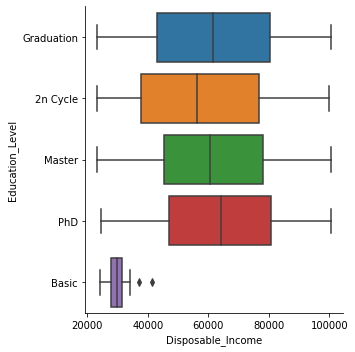

In [90]:
sns.catplot(data=df, x="Disposable_Income", y="Education_Level", kind="box")
plt.show()         # to suppress output of chart location

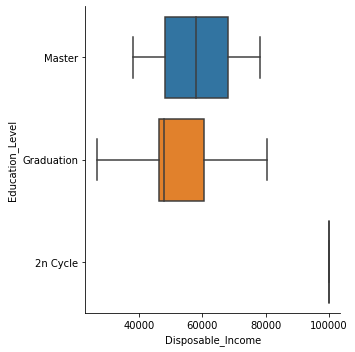

In [91]:
sns.catplot(data=df_complain, x="Disposable_Income", y="Education_Level", kind="box")
plt.show()         # to suppress output of chart location

whereas phd students had a good representation, none complained. the population of those who had basic education and 2n cycle are quite negligible.  phd students tend to have a higher mean of disposable income, so it shows that money could be a reason customers complained. Also from the two charts above, it becomes obvious why the percentage of those whose education level is graduation complaining increased as against the overall population. they had less money compared with their counterparts

In [92]:
df_complain.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1967.909091,58099.090909,0.545455,0.636364,63.545455,2.000000,3.818182,2.181818,5.636364,216.090909,22.727273,135.545455,21.272727,22.000000,21.090909,5.909091
std,16.854997,21572.661255,0.522233,0.674200,25.077335,0.894427,2.676497,3.370999,3.801913,240.974461,31.209264,189.857506,34.426998,36.496575,27.653045,2.119177
min,1944.000000,26715.600000,0.000000,0.000000,22.000000,1.000000,1.000000,0.000000,2.000000,11.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000
25%,1953.500000,46314.000000,0.000000,0.000000,46.000000,1.000000,2.000000,0.000000,3.000000,24.500000,4.000000,14.000000,0.000000,0.500000,5.500000,5.500000
50%,1965.000000,48960.000000,1.000000,1.000000,63.000000,2.000000,3.000000,0.000000,4.000000,39.000000,10.000000,27.000000,6.000000,8.000000,10.000000,7.000000
75%,1980.500000,73911.600000,1.000000,1.000000,78.500000,3.000000,5.000000,2.500000,7.000000,413.500000,25.000000,173.000000,24.500000,19.500000,18.000000,7.000000
max,1996.000000,99908.400000,1.000000,2.000000,100.000000,3.000000,9.000000,10.000000,13.000000,634.000000,107.000000,590.000000,102.000000,107.000000,84.000000,8.000000


In [93]:
df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,1969.595272,61579.699427,0.464900,0.533668,55.154011,2.310172,4.041547,2.546562,5.790115,297.352436,28.308023,152.377507,36.662607,25.220630,43.549427,5.351719
std,11.708476,21416.120868,0.542977,0.543068,28.814894,1.783375,2.630888,2.718841,3.212599,324.956977,38.677599,199.434437,53.881245,38.168951,50.446235,2.199431
min,1900.000000,23194.800000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,2.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,43349.400000,0.000000,0.000000,30.000000,1.000000,2.000000,0.000000,3.000000,30.750000,4.000000,16.000000,2.000000,1.000000,8.000000,4.000000
50%,1971.000000,60964.200000,0.000000,1.000000,56.000000,2.000000,3.000000,2.000000,5.000000,170.500000,10.000000,64.000000,12.000000,8.000000,26.000000,6.000000
75%,1978.000000,79555.500000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,489.250000,35.000000,213.250000,46.000000,32.000000,57.000000,7.000000
max,1996.000000,100604.400000,2.000000,2.000000,106.000000,13.000000,11.000000,11.000000,13.000000,1498.000000,202.000000,984.000000,259.000000,195.000000,249.000000,10.000000


In [94]:
df_complain["Campaign_accepted"].value_counts()/ len(df_complain)

None            0.909091
Cmp3Accepted    0.090909
Name: Campaign_accepted, dtype: float64

In [95]:
df["Campaign_accepted"].value_counts() / len(df)

None            0.811605
Cmp3Accepted    0.060888
Cmp1Accepted    0.051576
Cmp4Accepted    0.046562
Cmp5Accepted    0.022923
Cmp2Accepted    0.006447
Name: Campaign_accepted, dtype: float64

In [96]:
df_complain_percent = df_complain["Age_class"].value_counts()/len(df_complain)
df_complain_percent

group_D    0.454545
group_E    0.363636
group_C    0.090909
group_F    0.090909
group_A    0.000000
group_B    0.000000
Name: Age_class, dtype: float64

In [97]:
df_percent=df["Age_class"].value_counts()/len(df)
df_percent

group_E    0.513610
group_D    0.414040
group_C    0.037249
group_F    0.034384
group_A    0.000716
group_B    0.000000
Name: Age_class, dtype: float64

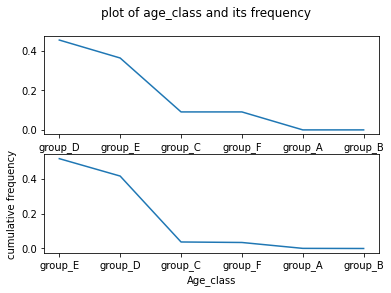

In [98]:
fig,ax = plt.subplots(2)
ax[0].plot(df_complain_percent)
ax[1].plot(df_percent)
fig.suptitle("plot of age_class and its frequency")
plt.xlabel("Age_class")
plt.ylabel("cumulative frequency")
fig.show();

from above, three things are clear, the average disposable income which those that complain have, is way smaller than the overall average. also, it seems that those that are not in any campaign tends to complain more, because they do not enjoy special bonuses accrueing from being in a campaign,lastly, they are mainly people in group_D

## relationship between year of birth and disposable income
<a name = "rel"></a>

In [99]:
birth_disp = df.groupby("Age_class")["Disposable_Income"].sum().sort_values()[1:]
birth_disp

Age_class
group_A      100238.4
group_F     2995027.2
group_C     4009314.0
group_D    38093376.0
group_E    40767304.8
Name: Disposable_Income, dtype: float64

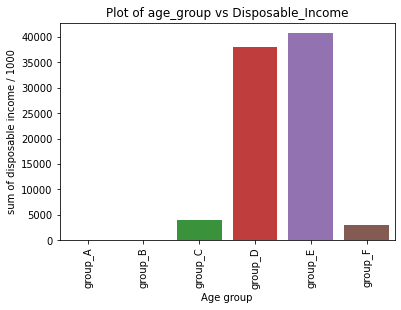

In [100]:
sns.barplot(x=birth_disp.index,y=birth_disp.values/1000)
plt.xticks(rotation=90)
plt.xlabel("Age group")
plt.ylabel("sum of disposable income / 1000")
plt.title("Plot of age_group vs Disposable_Income")
plt.show();

Age group E have more money than others

## relationship between recency,dispossable income, campaign accepted any_complant and respose
<a name = "response"></a>

Lets subset the data to show only those for which the respnse was a yes

In [101]:
df_yes = df[df["Response"]=="Yes"]

In [102]:
df_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 13 to 1545
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       194 non-null    object        
 1   Year_of_Birth            194 non-null    int64         
 2   Education_Level          194 non-null    object        
 3   Marital_Status           194 non-null    object        
 4   Disposable_Income        194 non-null    float64       
 5   No_of_Kids_in_home       194 non-null    int64         
 6   No_of_Teen_in_home       194 non-null    int64         
 7   Date_Customer            194 non-null    datetime64[ns]
 8   Recency                  194 non-null    int64         
 9   Discounted_Purchases     194 non-null    int64         
 10  WebPurchases             194 non-null    int64         
 11  CatalogPurchases         194 non-null    int64         
 12  StorePurchases           194 non-n

In [103]:
df_yes.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1969.376289,68680.441237,0.345361,0.345361,39.304124,2.530928,5.103093,4.010309,6.056701,491.530928,40.458763,260.525773,50.716495,33.932990,66.592784,5.494845
std,12.515593,22945.764553,0.476716,0.497979,25.968600,2.181308,2.575229,3.077563,3.047445,411.907306,48.203593,259.006495,61.761593,41.365434,60.455560,2.460564
min,1944.000000,23332.800000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,7.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,1958.250000,48004.800000,0.000000,0.000000,17.000000,1.000000,3.000000,1.000000,4.000000,92.000000,6.000000,46.250000,4.000000,2.000000,24.000000,3.250000
50%,1971.000000,69282.600000,0.000000,0.000000,31.500000,2.000000,5.000000,3.000000,6.000000,423.000000,19.500000,142.500000,21.000000,15.000000,42.000000,6.000000
75%,1978.000000,90281.100000,1.000000,1.000000,60.000000,3.000000,7.000000,6.000000,8.000000,858.750000,59.500000,450.500000,80.000000,52.500000,97.000000,8.000000
max,1996.000000,100604.400000,1.000000,2.000000,105.000000,11.000000,11.000000,11.000000,13.000000,1491.000000,196.000000,968.000000,240.000000,176.000000,245.000000,9.000000


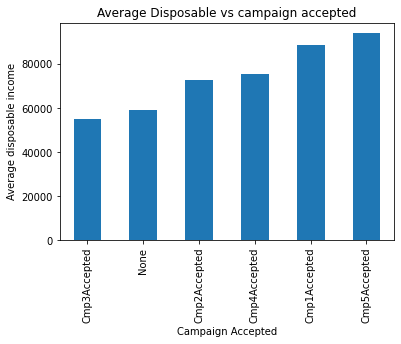

In [104]:
inc_camp = df_yes.groupby("Campaign_accepted")['Disposable_Income'].mean().sort_values()
inc_camp_plot = univariate_plotter(inc_camp,"bar","Campaign Accepted","Average disposable income","Average Disposable vs campaign accepted")

The above shows that for the people who responded to the campaign, the average disposable income of those who accepted the fifth campaign was higher, while those with lower disposable income tend to accept the third campaign

## What can be said about those who have a complant and responding to the campaign
<a name = "bca"></a>

In [105]:
df_yes["Any_Complain"].value_counts()

No     193
Yes      1
Name: Any_Complain, dtype: int64

From Above, we can see that of all people that responded "yes" only 1 person had a complain. who could that person be? lets find out

In [106]:
df_yes[df_yes["Any_Complain"]=="Yes"]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Any_Complain,Response,Campaign_accepted,Age_class,Month,Quarter,year_onboard
668,ID_G4EBAAHL,1996,2n Cycle,Single,99908.4,0,0,2012-09-18,63,1,5,10,12,541,30,590,38,107,67,6,Yes,Yes,Cmp3Accepted,group_F,September,3,2012


his Recency seems to be quite high. lets compare his recency to that of the average customers with same campaign accepted

In [107]:
df_campaign3=df_yes[df_yes["Campaign_accepted"]=="Cmp3Accepted"]

In [108]:
df_campaign3.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1972.052632,54992.305263,0.552632,0.315789,38.000000,2.263158,4.210526,3.342105,4.736842,328.815789,27.684211,137.473684,25.763158,20.289474,48.105263,6.552632
std,12.492046,22590.860204,0.503897,0.471069,26.330539,1.687541,3.172158,3.450627,3.293599,415.368144,37.263927,190.940452,42.497971,29.878952,39.749751,1.427479
min,1944.000000,25626.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,6.000000,0.000000,0.000000,7.000000,4.000000
25%,1968.000000,38128.800000,0.000000,0.000000,17.000000,1.000000,1.250000,1.000000,2.000000,20.000000,4.250000,13.000000,2.000000,1.000000,26.250000,6.000000
50%,1972.500000,46143.000000,1.000000,0.000000,32.000000,2.000000,3.000000,1.500000,3.000000,91.500000,11.500000,45.000000,5.500000,3.000000,34.000000,6.500000
75%,1979.000000,67068.600000,1.000000,1.000000,51.500000,2.000000,5.750000,4.750000,7.750000,537.000000,36.000000,200.500000,22.250000,31.750000,61.500000,8.000000
max,1996.000000,99908.400000,1.000000,1.000000,104.000000,7.000000,11.000000,10.000000,12.000000,1491.000000,188.000000,779.000000,160.000000,107.000000,185.000000,9.000000


The only obvious reason why he had a complaint was because he was not even supposed to be in this category. this campaign was obviously not made for him. He seems to be an outlier in most categories. for example, he is the youngest person in the category, and he tends to buy more of protein based goods, which is not what the campaign was made for. again the number of discounts he received was less than that which other persons in the catgory received.

### relationship between No of kids at home and average diposable income
<a name = "nave"></a>

<AxesSubplot:xlabel='No_of_Kids_in_home'>

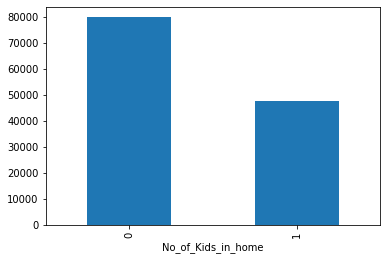

In [109]:
df_yes.groupby("No_of_Kids_in_home")["Disposable_Income"].mean().plot(kind="bar")

it seems like those without kid tend to have a higher disposable income comapred to those with kids.

## which campain gives more response
<a name = "campaign"></a>

#### let us subset the data to show only those where a campaign was accepted

In [110]:
df_camp=df[df['Campaign_accepted']!="None"]

In [111]:
df_camp.shape

(263, 27)

In [112]:
campaign_accepted=df_camp['Campaign_accepted'].value_counts().sort_values()
campaign_accepted

Cmp2Accepted     9
Cmp5Accepted    32
Cmp4Accepted    65
Cmp1Accepted    72
Cmp3Accepted    85
Name: Campaign_accepted, dtype: int64

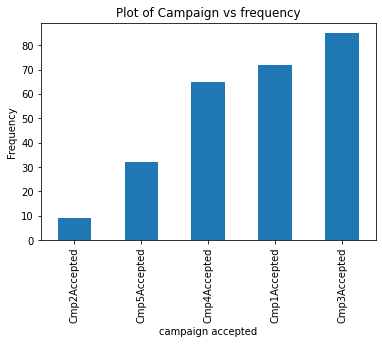

In [113]:
campaign_accepted.plot(kind="bar")
plt.xlabel("campaign accepted")
plt.ylabel("Frequency")
plt.title("Plot of Campaign vs frequency")
plt.show()


In [114]:
camp_acc=df_yes[df_yes['Campaign_accepted']!="None"]["Campaign_accepted"].value_counts().sort_values()
camp_acc

Cmp2Accepted     4
Cmp5Accepted    13
Cmp4Accepted    14
Cmp3Accepted    38
Cmp1Accepted    43
Name: Campaign_accepted, dtype: int64

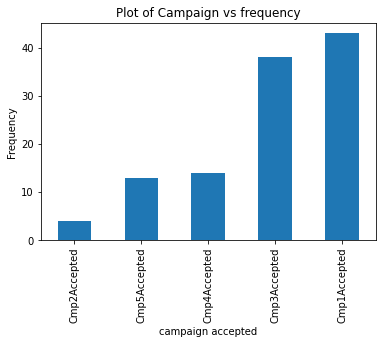

In [115]:
camp_acc.plot(kind="bar")
plt.xlabel("campaign accepted")
plt.ylabel("Frequency")
plt.title("Plot of Campaign vs frequency")
plt.show()


Above shows that despite that campaign3 has more frequency in the original datasets, campaign1 has more frequency for which there was a response

## Does higher Disposable income mean higher purchases?
<a name = "purchase"></a>

it becomes necessary to know who are actually the main buyers of the ecommerce products. does high disposable income translate to higher purchases, or are the products of the ecommerce better suited for the middle class and low income earners

from the column names, it will be easy for us to know the products that customers bought. to get the amount spent, its just to add up the amount spent on the products

In [116]:
# get the names of the columns in the datasets
column = []
for i in df.columns:
  column.append(i)

In [117]:
column

['ID',
 'Year_of_Birth',
 'Education_Level',
 'Marital_Status',
 'Disposable_Income',
 'No_of_Kids_in_home',
 'No_of_Teen_in_home',
 'Date_Customer',
 'Recency',
 'Discounted_Purchases',
 'WebPurchases',
 'CatalogPurchases',
 'StorePurchases',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds',
 'WebVisitsMonth',
 'Any_Complain',
 'Response',
 'Campaign_accepted',
 'Age_class',
 'Month',
 'Quarter',
 'year_onboard']

In [118]:
# get the columns that contains data for goods bought
amount = []

for i in range(len(column)):
  if column[i][:6] == "Amount":        # columns that shows product bought begins with "Amount"
    amount.append(column[i])


In [119]:
df_sum = df[amount]  # create a new dataframe to enable easy EDA

In [120]:
df_sum["Amount_Spent"] = df_sum.sum(axis="columns")  # to get the value which each obesrvation spent, sum along columns

In [121]:
df["Amount_Spent"] = df_sum["Amount_Spent"]

In [122]:
df["Disposable_Income"].corr(df["Amount_Spent"])

0.8260825381752672

The value 0.826 is very high. this means that the ecommerce should continue to target customers with high disposable income. 

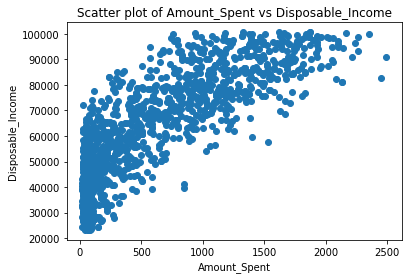

In [123]:
plt.scatter(df["Amount_Spent"],df["Disposable_Income"])
plt.xlabel("Amount_Spent")
plt.ylabel("Disposable_Income")
plt.title("Scatter plot of Amount_Spent vs Disposable_Income")
plt.show();

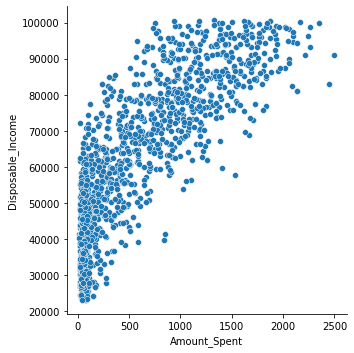

In [124]:
sns.relplot(data=df,x= "Amount_Spent",y="Disposable_Income")

But are this high income customers even satisfied with the ecommerce store ? when was the last time they patronized the store?

In [125]:
df["Recency"].describe()

count    1396.000000
mean       55.154011
std        28.814894
min         7.000000
25%        30.000000
50%        56.000000
75%        80.000000
max       106.000000
Name: Recency, dtype: float64

on average, it has been upto 50 days since customers last bought goods

In [126]:
df_recency = df.copy() # making a copy 

In [127]:
df_recency["Recency"] = pd.cut(df_recency["Recency"], bins=[7,30,57,80,106],labels=["level_1","level_2","level_3","level_4"])

In [128]:
df_recency.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Any_Complain,Response,Campaign_accepted,Age_class,Month,Quarter,year_onboard,Amount_Spent
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,level_2,2,1,1,4,71,3,16,0,6,20,3,No,No,None,group_D,June,2,2014,116
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-08-01,level_1,6,5,1,8,205,22,111,50,15,19,6,No,No,None,group_D,August,3,2013,422
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,level_2,3,4,1,3,56,15,49,17,24,24,8,No,No,None,group_E,September,3,2013,185
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,level_3,1,3,7,9,412,117,445,181,165,203,1,No,No,Cmp1Accepted,group_D,January,1,2014,1523
5,ID_3S3HRGH6,1960,Master,Married,41090.4,0,1,2014-03-23,level_2,1,0,0,3,13,5,4,0,0,1,5,No,No,None,group_D,March,1,2014,23


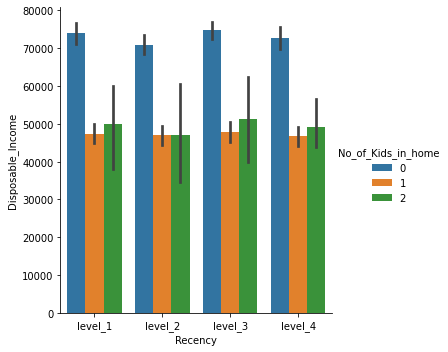

In [129]:
sns.catplot(data=df_recency,x="Recency",y="Disposable_Income",kind="bar",hue = "No_of_Kids_in_home")

What is obvious here is that disposable income is not linked to recency. and, people with no children have higher income

## Relationship between complaint and recency
<a name = "recency"></a>

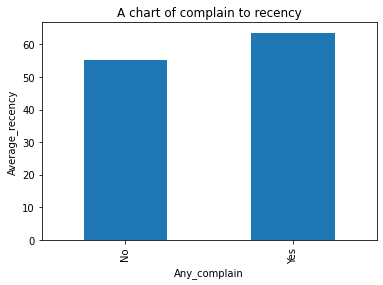

In [130]:
rec_series = df.groupby("Any_Complain")["Recency"].mean()
rec_plot = univariate_plotter(rec_series,"bar","Any_complain","Average_recency","A chart of complain to recency")

it is reasonable that people who have complain will be less likely to come back

# Conclusion
<a name = "conclusion"> </a>

From the ongoing Analysis, the following has been drawn as conclusion
1. the business is not doing so well, the average recency is too high to sustain the business, if this trend continue, the ecommerce will fail
2. Customers with kids are prolly not what the business was made for
3. The advertisement campaign is likely not effective, as fewer customers came within the same period 2014 compared to 2013
4. The more money people have, the more their ability to buy goods on impose. as shown by their number of visits to the ecommerce website being less than that of other customers with lower disposable income


# References 
<a name = "Reference"></a>

1. Stackoverflow.com
2. pandas documentation
3. w3schools.com